## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [20]:
X = df.drop(columns=['math_score'], axis=1 )

In [15]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [21]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:     ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [22]:
y = df['math_score']

In [23]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [24]:
# Create column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
) 

In [25]:
X_scaled = preprocessor.fit_transform(X)

In [27]:
X_scaled.shape

(1000, 19)

In [41]:
# Separate Dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=43)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [42]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [43]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decission Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(verbose=False),
    'Adaboost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print("\n")

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3104
- Mean Absolute Error: 4.2220
- R2 Score: 0.8774
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4007
- Mean Absolute Error: 4.3498
- R2 Score: 0.8703


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5415
- Mean Absolute Error: 5.1315
- R2 Score: 0.8139
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8436
- Mean Absolute Error: 5.5248
- R2 Score: 0.7917


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3113
- Mean Absolute Error: 4.2230
- R2 Score: 0.8773
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4014
- Mean Absolute Error: 4.3516
- R2 Score: 0.8703


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.0368
- Mean Absolute Error: 4.7753
- R2 Score: 0.8415
-----------------------

### Results

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)),
             columns=['Model Name','R2_score']).sort_values(by="R2_score", ascending=False)


,Model Name,R2_score
0,Linear Regression,0.870290
2,Ridge,0.870260
7,CatBoosting Regressor,0.849671
5,Random Forest Regressor,0.844536
8,Adaboost Regressor,0.839358
6,XGBRegressor,0.803920
1,Lasso,0.791725
3,K-Neighbors Regressor,0.790305
4,Decission Tree,0.742270


## Linear Regression

In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.03


## Plot y_pred and y_test

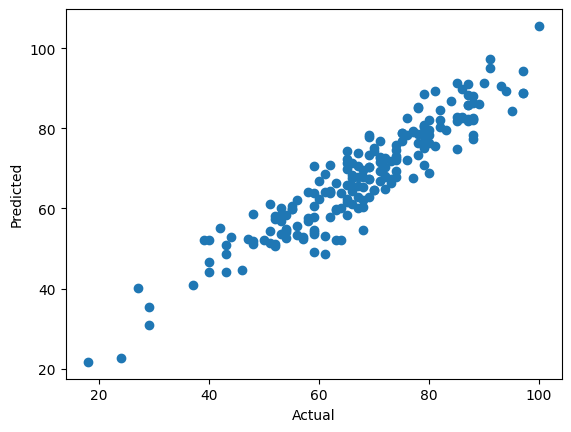

In [46]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


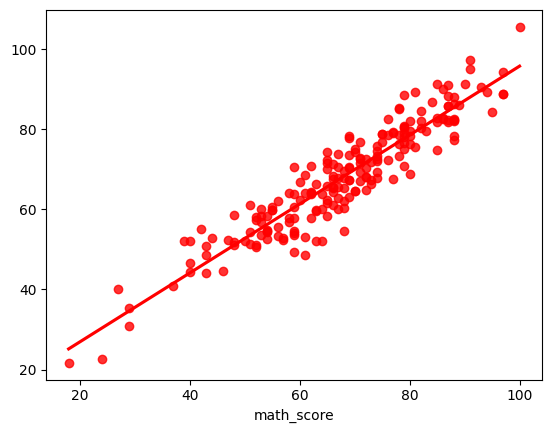

In [48]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()

#### Difference between Actual and Predicted Values

In [49]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
858,52,51.12500,0.87500
986,40,46.65625,-6.65625
183,65,62.31250,2.68750
502,63,59.93750,3.06250
710,93,90.53125,2.46875
...,...,...,...
27,67,65.53125,1.46875
244,75,76.84375,-1.84375
294,78,78.53125,-0.53125
176,46,44.71875,1.28125
